In [75]:
# import libraries
!pip install imbalanced-learn
!pip install pyreadr
import pyreadr
import pandas as pd
import numpy as np

# visualisations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

# models
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, mean_squared_error, accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE 

import scipy
from scipy.stats import loguniform

In [76]:
# Connnect to google drive 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [77]:
# Import module
import sys
import os

py_file_location = "/content/gdrive/My Drive/ML-exam/dataprocessing"
sys.path.append(os.path.abspath(py_file_location))

import preprocessing as pp

# Loading datasets

In [78]:
# loading hiv and tubercolosis data
data_hiv = pyreadr.read_r('/content/gdrive/MyDrive/ML-exam/dataprocessing/dataHIV.Rdata')['dfHIV']
data_tb = pyreadr.read_r('/content/gdrive/MyDrive/ML-exam/dataprocessing/dataTB.RData')['dfTB']
df_hiv, df_tb = data_hiv.copy(), data_tb.copy()
print(df_hiv.shape)
print(df_tb.shape)
# combine data
data_combined = pd.concat([data_hiv, data_tb], ignore_index=True)
df_comb = data_combined.copy() 

(38567, 38)
(148720, 39)


## Preprocessing of HIV

In [79]:
# imputing nan value for ClaimSec
data_hiv.loc[data_hiv[data_hiv.aucID == "0306500000117000001"].index,"claimSec"] = 1611.80
data_hiv.loc[data_hiv[data_hiv.aucID == "0356200006718000097"].index,"claimSec"] = 424.1

# imputing nan value for bvSameBO
data_hiv.loc[data_hiv[data_hiv.aucID == "0888500000219000457"].index,"bvSameBO"] = 1
data_hiv = pp.encode_variables(data_hiv)
data_hiv = pp.filter_data(data_hiv)
data_hiv = pp.scale_variables(data_hiv)
print('Before handling missing values', data_hiv.shape)

# split on cleaned data
x_train_hiv, x_test_hiv, y_train_hiv, y_test_hiv = pp.create_splits(data_hiv, 'collusion')

# remove na
df_hiv_removed = data_hiv.dropna().copy()
print('After handling missing values', df_hiv_removed.shape)
x_train_r_hiv, x_test_r_hiv, y_train_r_hiv, y_test_r_hiv = pp.create_splits(df_hiv_removed, 'collusion')

# remove outliers
mask_hiv = pp.remove_outliers(x_train_r_hiv, 0.15)
x_train_r_hiv, y_train_r_hiv = x_train_r_hiv.iloc[mask_hiv, :], y_train_r_hiv.iloc[mask_hiv]
print('After handling missing values', x_train_r_hiv.shape)

# upsamle the minority class
x_train_r_hiv, y_train_r_hiv = pp.oversample(x_train_r_hiv, y_train_r_hiv)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:1565: RuntimeWarning: invalid value encountered in subtract
  X -= self.center_


Before handling missing values (4116, 23)
Shape of x and y before split (4116, 22) (4116,)
Shape of x_train and x_test after split (3292, 22) (824, 22)
Train set contains 7.98906439854192 pct ratio of collusion labels
Test set contains 5.461165048543689 pct ratio of collusion labels

After handling missing values (3129, 23)
Shape of x and y before split (3129, 22) (3129,)
Shape of x_train and x_test after split (2503, 22) (626, 22)
Train set contains 7.151418298042349 pct ratio of collusion labels
Test set contains 7.18849840255591 pct ratio of collusion labels



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


After handling missing values (2127, 22)
Counter({0.0: 1973, 1.0: 154})
Counter({0.0: 1973, 1.0: 1973})


## preproccessing of TB

In [ ]:
df_tb = pp.encode_variables(df_tb)
df_tb = pp.filter_data(df_tb)
df_tb = df_tb.drop('aucDateOR', axis=1)
df_tb = pp.scale_variables(df_tb)
print('Before handling missing values', df_tb.shape)

# split on cleaned data
x_train, x_test, y_train, y_test = pp.create_splits(df_tb, 'collusion')

# remove na
df_tb_removed = df_tb.dropna().copy()
print('After handling missing values', df_tb_removed.shape)
x_train_r, x_test_r, y_train_r, y_test_r = pp.create_splits(df_tb_removed, 'collusion')

# remove outliers
mask = pp.remove_outliers(x_train_r, 0.15)
x_train_r, y_train_r = x_train_r.iloc[mask, :], y_train_r.iloc[mask]
print('After handling missing values', x_train_r.shape)

# upsample the minority class
x_train_r, y_train_r = pp.oversample(x_train_r, y_train_r)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:1565: RuntimeWarning: invalid value encountered in subtract
  X -= self.center_


Before handling missing values (23294, 23)
Shape of x and y before split (23294, 22) (23294,)
Shape of x_train and x_test after split (18635, 22) (4659, 22)
Train set contains 6.391199356050442 pct ratio of collusion labels
Test set contains 6.52500536595836 pct ratio of collusion labels

After handling missing values (20233, 23)
Shape of x and y before split (20233, 22) (20233,)
Shape of x_train and x_test after split (16186, 22) (4047, 22)
Train set contains 5.7827752378598785 pct ratio of collusion labels
Test set contains 5.238448233259204 pct ratio of collusion labels



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


After handling missing values (13758, 22)
Counter({0.0: 12926, 1.0: 832})
Counter({0.0: 12926, 1.0: 12926})


#Random gridsearch baselines

In [ ]:
def create_baseline_randomized(x, y, est, params):
  '''Trains given model from sklearn library using cross-validation research with random parameter selection'''
  
  clf_dict = {'rfc': RandomForestClassifier(), 'svc': SVC(max_iter = 10000), 'xgb': XGBClassifier()}

  #training model
  model = RandomizedSearchCV(estimator=clf_dict[est], param_distributions=params, cv=3, scoring="f1", refit=True, n_iter = 5, n_jobs = -1, verbose = 2)
  model.fit(x, y)

  #printing scores and model estimators
  print("best mean cross-validation score: {:.3f}".format(model.best_score_))
  print("best parameters:", model.best_params_) 

  return model

### HIV models

In [ ]:
# Random Forest Classifier
params_rfc = {"bootstrap" : [True, False], 
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' :  list(range(1, 5)),
              'criterion' : ['gini', 'entropy'],
              'n_estimators' :  list(range(1, 200)),
              'class_weight' :["balanced", "balanced_subsample", None]}

rfc_model_hiv = create_baseline_randomized(x_train_r_hiv, y_train_r_hiv, 'rfc', params_rfc)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
best mean cross-validation score: 0.878
best parameters: {'n_estimators': 122, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': True}


In [ ]:
# XGBClassifier
params_xgb = {'booster':['gbtree'], 
              'max_depth' : list(range(1, 5)),
              'n_estimators' :  list(range(1, 200)),
              'learning_rate' : loguniform(1e-5, 0.1),
              'scale_pos_weight' : list(range(14)),
              'class_weight' :["balanced"]}

xgb_tree_model_hiv = create_baseline_randomized(x_train_hiv, y_train_hiv, 'xgb', params_xgb)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
best mean cross-validation score: 0.362
best parameters: {'booster': 'gbtree', 'class_weight': 'balanced', 'learning_rate': 5.9930683997133486e-05, 'max_depth': 4, 'n_estimators': 148, 'scale_pos_weight': 11}


In [ ]:
# SVM
params_svc = {'kernel': ('linear', 'poly', 'rbf'), 
              'C': range(1, 10),
              'gamma': ['auto', 0.1, 0.02, 0.001],
              'class_weight' :["balanced", None]}

svc_model_hiv = create_baseline_randomized(x_train_r_hiv, y_train_r_hiv, 'svc', params_svc)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
best mean cross-validation score: 0.138
best parameters: {'kernel': 'poly', 'gamma': 0.001, 'degree': 7, 'class_weight': 'balanced', 'C': 4}


### TB models

In [ ]:
# Random Forest Classifier
params_rfc = {"bootstrap" : [True, False], 
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' :  list(range(1, 10)) + [None],
              'criterion' : ['gini', 'entropy'],
              'n_estimators' :  list(range(1, 200)),
              'class_weight' :["balanced", "balanced_subsample", None]}

rfc_model = create_baseline_randomized(x_train_r, y_train_r, 'rfc', params_rfc)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
best mean cross-validation score: 0.903
best parameters: {'n_estimators': 15, 'max_features': 'log2', 'max_depth': 19, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}


In [ ]:
# SVM
params_svc = {'kernel': ('linear', 'poly', 'rbf'), 
              'C': range(1, 10),
              'gamma': ['auto', 1, 0.1, 0.02, 0.001],
              'class_weight' :["balanced"],
              'max_iter' : range(10000, 100000)}

svc_model = create_baseline_randomized(x_train_r, y_train_r, 'svc', params_svc)

TypeError: ignored

In [ ]:
# XGBClassifier
params_xgb = {'booster':['gbtree'], 
              'max_depth' : list(range(1, 25)),
              'n_estimators' :  list(range(1, 200)),
              'learning_rate' : loguniform(1e-5, 0.1),
              'scale_pos_weight' : list(range(14)),
              'class_weight' :["balanced"]}

xgb_tree_model = create_baseline_randomized(x_train, y_train, 'xgb', params_xgb)

## Scores

### HIV models

In [ ]:
#RFC - predicting labels on test set
rfc_pred_hiv = rfc_model_hiv.predict(x_test_r_hiv)
print('-----------------------------------------------------')
print('RFC report:\n{0}'.format(classification_report(y_test_r_hiv, rfc_pred_hiv)))

#SVC - predicting labels on test set
svc_pred_hiv = svc_model_hiv.predict(x_test_r_hiv)
print('-----------------------------------------------------')
print('SVC report:\n{0}'.format(classification_report(y_test_r_hiv, svc_pred_hiv)))

#xgb - predicting labels on test set
xgb_pred_hiv = xgb_tree_model_hiv.predict(x_test_hiv)
print('-----------------------------------------------------')
print('XGB tree report:\n{0}'.format(classification_report(y_test_hiv, xgb_pred_hiv)))


-----------------------------------------------------
SVC report:
              precision    recall  f1-score   support

         0.0       0.99      0.71      0.83       581
         1.0       0.19      0.89      0.32        45

    accuracy                           0.72       626
   macro avg       0.59      0.80      0.57       626
weighted avg       0.93      0.72      0.79       626



NameError: ignored

### TB models

In [ ]:
#RFC - predicting labels on test set
rfc_pred = rfc_model.predict(x_test_r)
print('-----------------------------------------------------')
print('RFC report:\n{0}'.format(classification_report(y_test_r, rfc_pred)))

SVC - predicting labels on test set
svc_pred = svc_model.predict(x_test_r)
print('-----------------------------------------------------')
print('SVC report:\n{0}'.format(classification_report(y_test_r, svc_pred)))

#xgb - predicting labels on test set
xgb_pred = xgb_tree_model.predict(x_test)
print('-----------------------------------------------------')
print('XGB tree report:\n{0}'.format(classification_report(y_test, xgb_pred)))


-----------------------------------------------------
RFC report:
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.85      3835
         1.0       0.17      0.95      0.29       212

    accuracy                           0.76      4047
   macro avg       0.58      0.85      0.57      4047
weighted avg       0.95      0.76      0.83      4047

-----------------------------------------------------
KNN report:
              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90      3835
         1.0       0.17      0.62      0.26       212

    accuracy                           0.82      4047
   macro avg       0.57      0.72      0.58      4047
weighted avg       0.93      0.82      0.86      4047

-----------------------------------------------------
XGB tree report:
              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86      4347
         1.0       0.22      0.94 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


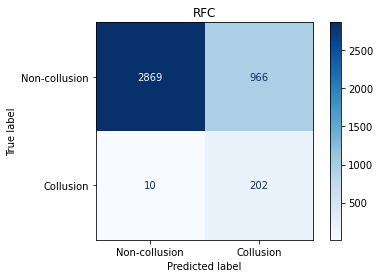

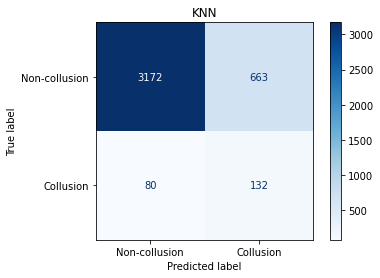

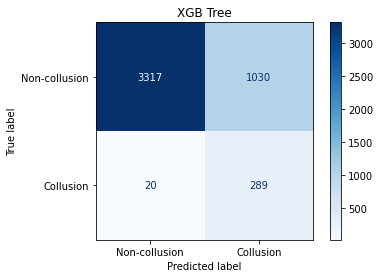

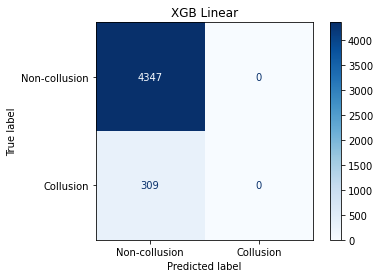

In [ ]:
labels = ["Non-collusion", "Collusion"]

cm_rfc = confusion_matrix(y_test_r, rfc_pred)
#cm_svc = confusion_matrix(y_test_r, svc_pred)
cm_knn = confusion_matrix(y_test_r, knn_pred)
cm_xgb = confusion_matrix(y_test, xgb_pred)
cm_xgb_lin = confusion_matrix(y_test, xgb_lin_pred)

plot_cm_rfc = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=labels)
#plot_cm_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=labels)
plot_cm_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=labels)
plot_cm_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=labels)
plot_cm_xgb_lin = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_lin, display_labels=labels)

plot_cm_rfc.plot(cmap=plt.cm.Blues).ax_.set_title('RFC')
#plot_cm_svc.plot(cmap=plt.cm.Blues).ax_.set_title('SVC')
plot_cm_knn.plot(cmap=plt.cm.Blues).ax_.set_title('KNN')
plot_cm_xgb.plot(cmap=plt.cm.Blues).ax_.set_title('XGB Tree')
plot_cm_xgb_lin.plot(cmap=plt.cm.Blues).ax_.set_title('XGB Linear')

plt.show()

## Feature importance of HIV and TB Random Forest Models

In [ ]:
def feature_extraction(df, cls):
  ''' A function that creates a dataframe with feature and score of importance. Input is dataframe to take features from and classifier'''
  rows = [[name, round(score, 2)] for name, score in zip(df.columns, cls.feature_importances_)]
  df_score = pd.DataFrame(rows, columns=["feature", "score"])
  df_score = df_score.sort_values(by=["score"], ascending=False)
  return df_score

In [ ]:
# Feature importance exctracted from HIV Random Forest model
clf_hiv = RandomForestClassifier(n_estimators = 181, max_features = 'auto', max_depth = 3, criterion = 'gini', class_weight = 'balanced_subsample', bootstrap = False)
clf_hiv.fit(x_train_r_hiv, y_train_r_hiv)
feature_hiv =feature_extraction(x_train_r_hiv, clf_hiv).head(10)

<Figure size 720x480 with 0 Axes>

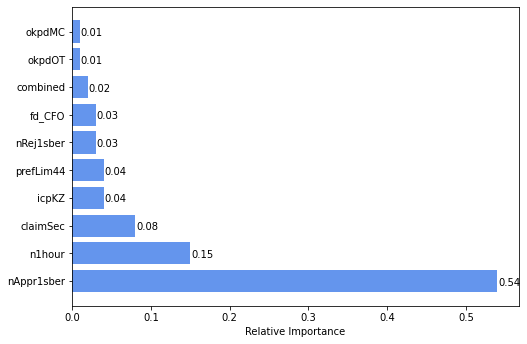

In [ ]:
def feature_visualization(feature_list, score_list):
  ''' Create a visalisation with top 10 informative features. As input takes lists with features and scores'''
  figure(figsize=(9, 6), dpi=80)
  fig = plt.figure()
  ax = fig.add_subplot()
  plt.barh(feature_list, score_list, color='cornflowerblue', align='center')
  plt.xlabel('Relative Importance')
  for index, value in enumerate(score_list):
      plt.text(value+0.001, index -0.15, str(value))
  return plt.show()

feature_visualization(feature_hiv.feature, feature_hiv.score)

In [ ]:
clf_tb = RandomForestClassifier(n_estimators = 181, max_features = 'auto', max_depth = 3, criterion = 'gini', class_weight = 'balanced_subsample', bootstrap = False)
clf_tb.fit(x_train_r, y_train_r)
feature_tb = feature_extraction(x_train_r, clf_tb).head(10)

<Figure size 680x480 with 0 Axes>

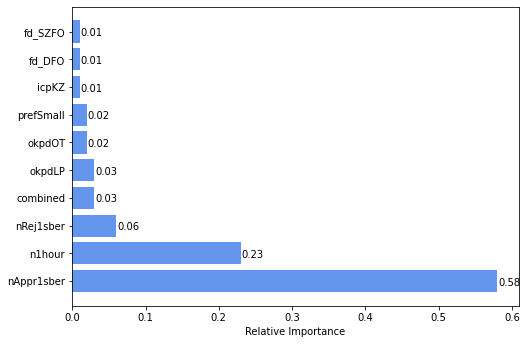

In [ ]:
feature_visualization(feature_tb.feature, feature_tb.score)

# Random subsamplig

In [ ]:
def random_subsampling(df, y, est, params):
  """Monte Carlo validation. The function randomply split data into train and test sets and test the chosen model after fitting train set. 
  recall, precision, f1 score and balanced accuracy are saved as lists. Takes df, name of the label variable, classifier and parameters to train the model"""
  recall_list = []
  precision_list = []
  f1_list = []
  weighted_accuracy_list = []

  clf_dict = {'rfc': RandomForestClassifier, 'svc': SVC, 'knn': KNeighborsClassifier, 'xgb': XGBClassifier}

  for i in range(1000):
    print(i)
    # split data
    x = df.loc[:, df.columns != y]
    x_train, x_test, y_train, y_test = train_test_split(x, df[y], test_size=0.2)

    # make model
    model = clf_dict[est](**params)
    model.fit(x_train, y_train)

    # predict values
    pred = model.predict(x_test)

    # safe and check metrics
    recall_list.append(recall_score(y_test, pred))
    precision_list.append(precision_score(y_test, pred))
    f1_list.append(f1_score(y_test, pred))
    weighted_accuracy_list.append(balanced_accuracy_score(y_test, pred))


  return recall_list, precision_list, f1_list, weighted_accuracy_list

### TB models

In [ ]:
# rfc model for tb
rfc_tb_param = {'n_estimators': 181,
                'max_features': 'auto', 
                'max_depth': 3, 
                'criterion': 'gini', 
                'class_weight': 'balanced_subsample', 
                'bootstrap': False}

metrics_rfc = random_subsampling(df_tb_removed, "collusion", "rfc", rfc_tb_param)

In [ ]:
recall_tb_rfc = np.mean(metrics_rfc[0])
precision_tb_rfc = np.mean(metrics_rfc[1])
f1_tb_rfc = np.mean(metrics_rfc[2])
accuracy_tb_rfc = np.mean(metrics_rfc[3])
print("Metrics for rfc model for TB data set: \nRecall is equal to {0} \nPrecision is equal to {1} \nf1 is equal to {2} \nBalanced accuracy is equal to {3}".format(recall_tb_rfc, precision_tb_rfc, f1_tb_rfc, accuracy_tb_rfc))

Metrics for rfc model for TB data set: 
Recall is equal to 0.9967710808944263 
Precision is equal to 0.18839592475428987 
f1 is equal to 0.31677181359319684 
Balanced accuracy is equal to 0.8693001293681444


In [ ]:
# xgb model for tb
xgb_tb_param = {'booster': 'gbtree', 
                'class_weight': 'balanced', 
                'learning_rate': 0.09713945613758697, 
                'max_depth': 8, 
                'n_estimators': 3, 
                'scale_pos_weight': 9}

metrics_xgb = random_subsampling(df_tb, "collusion", "xgb", xgb_tb_param)

In [ ]:
recall_tb_xgb = np.mean(metrics_xgb[0])
precision_tb_xgb = np.mean(metrics_xgb[1])
f1_tb_xgb = np.mean(metrics_xgb[2])
accuracy_tb_xgb = np.mean(metrics_xgb[3])

print("Metrics for xgb model for TB data set: \nRecall is equal to {0} \nPrecision is equal to {1} \nf1 is equal to {2} \nBalanced accuracy is equal to {3}".format(recall_tb_xgb, precision_tb_xgb, f1_tb_xgb, accuracy_tb_xgb))

Metrics for xgb model for TB data set: 
Recall is equal to 0.9243932208898802 
Precision is equal to 0.21183795597499255 
f1 is equal to 0.3445388352596882 
Balanced accuracy is equal to 0.8440130571654586


In [ ]:
# svc model for tb 
svc_tb_param = {'kernel': 'linear', 'gamma': 0.02, 'class_weight': 'balanced', 'C': 4, 'max_iter' : 10000}

metrics_svc = random_subsampling(df_tb_removed, "collusion", "svc", svc_tb_param)

In [ ]:
recall_tb_svc = np.mean(metrics_svc[0])
precision_tb_svc = np.mean(metrics_svc[1])
f1_tb_svc = np.mean(metrics_svc[2])
accuracy_tb_svc = np.mean(metrics_svc[3])

print("Metrics for svc model for TB data set: \nRecall is equal to {0} \nPrecision is equal to {1} \nf1 is equal to {2} \nBalanced accuracy is equal to {3}".format(recall_tb_svc, precision_tb_svc, f1_tb_svc, accuracy_tb_svc))

NameError: ignored

### HIV models

In [ ]:
# rfc model for hiv 
rfc_hiv_param = {'n_estimators': 119, 
                'max_features': 'auto', 
                'max_depth': 4, 
                'criterion': 'gini', 
                'class_weight': 'balanced_subsample', 
                'bootstrap': True}

metrics_rfc_hiv = random_subsampling(df_hiv_removed, "collusion", "rfc", rfc_hiv_param)

In [ ]:
recall_hiv_rfc = np.mean(metrics_rfc_hiv[0])
precision_hiv_rfc = np.mean(metrics_rfc_hiv[1])
f1_hiv_rfc = np.mean(metrics_rfc_hiv[2])
accuracy_hiv_rfc = np.mean(metrics_rfc_hiv[3])

print("Metrics for rfc model for HIV data set: \nRecall is equal to {0} \nPrecision is equal to {1} \nf1 is equal to {2} \nBalanced accuracy is equal to {3}".format(recall_hiv_rfc, precision_hiv_rfc, f1_hiv_rfc, accuracy_hiv_rfc))

Metrics for rfc model for HIV data set: 
Recall is equal to 0.9726188638392919 
Precision is equal to 0.20086899355128862 
f1 is equal to 0.3322788550374837 
Balanced accuracy is equal to 0.8360496214304133


In [ ]:
# xgb model for hiv
xgb_hiv_param = {'booster': 'gbtree', 'class_weight': 'balanced', 
                 'learning_rate': 5.9930683997133486e-05, 
                 'max_depth': 4, 
                 'n_estimators': 148, 
                 'scale_pos_weight': 11}

metrics_xgb_hiv = random_subsampling(data_hiv, "collusion", "xgb", xgb_hiv_param)

In [ ]:
recall_hiv_xgb = np.mean(metrics_xgb_hiv[0])
precision_hiv_xgb = np.mean(metrics_xgb_hiv[1])
f1_hiv_xgb = np.mean(metrics_xgb_hiv[2])
accuracy_hiv_xgb = np.mean(metrics_xgb_hiv[3])

print("Metrics for xgb model for HIV data set: \nRecall is equal to {0} \nPrecision is equal to {1} \nf1 is equal to {2} \nBalanced accuracy is equal to {3}".format(recall_hiv_xgb, precision_hiv_xgb, f1_hiv_xgb, accuracy_hiv_xgb))

Metrics for xgb model for HIV data set: 
Recall is equal to 0.9545905805073568 
Precision is equal to 0.20492414837754114 
f1 is equal to 0.33686602283747547 
Balanced accuracy is equal to 0.8280102668635966


In [ ]:
# svc model for hiv
svc_hiv_param = {'kernel': 'linear', 
                 'gamma': 'auto', 
                 'class_weight': 'balanced', 
                 'C': 6,
                 'max_iter' : 1000}

metrics_svc_hiv = random_subsampling(df_hiv_removed, "collusion", "svc", svc_hiv_param)

In [ ]:
recall_hiv_svc = np.mean(metrics_svc_hiv[0])
precision_hiv_svc = np.mean(metrics_svc_hiv[1])
f1_hiv_svc = np.mean(metrics_svc_hiv[2])
accuracy_hiv_svc = np.mean(metrics_svc_hiv[3])

print("Metrics for svc model for HIV data set: \nRecall is equal to {0} \nPrecision is equal to {1} \nf1 is equal to {2} \nBalanced accuracy is equal to {3}".format(recall_hiv_svc, precision_hiv_svc, f1_hiv_svc, accuracy_hiv_svc))

Metrics for svc model for HIV data set: 
Recall is equal to 0.8257398219451118 
Precision is equal to 0.13956406676710553 
f1 is equal to 0.2381481775207118 
Balanced accuracy is equal to 0.7162540600441182


# Fitting HIV data to TB model

In [ ]:
def random_subsampling_hiv_data(df, y, df2, est, params):
  '''a function that allows to train the chosen model on one dataset and test using another dataset. 
  Takes two datasets to use, name of the label variable, classifier and parameters to train the model'''
  recall_list = []
  precision_list = []
  f1_list = []
  weighted_accuracy_list = []

  clf_dict = {'rfc': RandomForestClassifier, 'svc': SVC, 'knn': KNeighborsClassifier, 'xgb': XGBClassifier}

  for i in range(1000):
    print(i)
    # split data
    x = df.loc[:, df.columns != y]
    x_train, x_test, y_train, y_test = train_test_split(x, df[y], test_size=0.2)

    # make model
    model = clf_dict[est](**params)
    model.fit(x_train, y_train)

    # predict values
    pred = model.predict(df2.loc[:, df2.columns != y])

    # safe and check metrics
    recall_list.append(recall_score(df2[y], pred))
    precision_list.append(precision_score(df2[y], pred))
    f1_list.append(f1_score(df2[y], pred))
    weighted_accuracy_list.append(balanced_accuracy_score(df2[y], pred))


  return recall_list, precision_list, f1_list, weighted_accuracy_list

In [ ]:
# rfc model for tb
rfc_tb_param = {'n_estimators': 181,
                'max_features': 'auto', 
                'max_depth': 3, 
                'criterion': 'gini', 
                'class_weight': 'balanced_subsample', 
                'bootstrap': False}

metrics_hiv_data = random_subsampling_hiv_data(df_tb_removed, "collusion", df_hiv_removed, "rfc", rfc_tb_param)

In [ ]:
recall_hiv_tb = np.mean(metrics_hiv_data[0])
precision_hiv_tb = np.mean(metrics_hiv_data[1])
f1_hiv_tb = np.mean(metrics_hiv_data[2])
accuracy_hiv_tb = np.mean(metrics_hiv_data[3])


print("Metrics for rfc model for HIV data set on TB model: \nRecall is equal to {0} \nPrecision is equal to {1} \nf1 is equal to {2} \nBalanced accuracy is equal to {3}".format(recall_hiv_tb, precision_hiv_tb, f1_hiv_tb, accuracy_hiv_tb))

Metrics for rfc model for HIV data set on TB model: 
Recall is equal to 0.99959375 
Precision is equal to 0.19966098474252317 
f1 is equal to 0.33283953150204865 
Balanced accuracy is equal to 0.845314775172117


# Models for combined datasets

### preprocessing of combined dataset

In [ ]:
df_comb = pp.encode_variables(df_comb)
df_comb = pp.filter_data(df_comb)
df_comb = df_comb.drop('aucDateOR', axis=1)
df_comb = pp.scale_variables(df_comb)
print('Before handling missing values', df_comb.shape)

# split on cleaned data
x_train_c, x_test_c, y_train_c, y_test_c = pp.create_splits(df_comb, 'collusion')

# remove na
df_comb_removed = df_comb.dropna().copy()
print('After handling missing values', df_comb_removed.shape)
x_train_r_c, x_test_r_c, y_train_r_c, y_test_r_c = pp.create_splits(df_comb_removed, 'collusion')

# remove outliers 
mask3 = pp.remove_outliers(x_train_r_c, 0.15)
x_train_r_c, y_train_r_c = x_train_r_c.iloc[mask3, :], y_train_r_c.iloc[mask3]
print('After handling missing values', x_train_r_c.shape)

# upsample
x_train_r_c, y_train_r_c = pp.oversample(x_train_r_c, y_train_r_c)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:1565: RuntimeWarning: invalid value encountered in subtract
  X -= self.center_


Before handling missing values (27410, 23)
Shape of x and y before split (27410, 22) (27410,)
Shape of x_train and x_test after split (21928, 22) (5482, 22)
Train set contains 6.5897482670558185 pct ratio of collusion labels
Test set contains 6.5304633345494345 pct ratio of collusion labels

After handling missing values (23359, 23)
Shape of x and y before split (23359, 22) (23359,)
Shape of x_train and x_test after split (18687, 22) (4672, 22)
Train set contains 5.875742494782469 pct ratio of collusion labels
Test set contains 5.864726027397261 pct ratio of collusion labels



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


After handling missing values (15884, 22)
Counter({0.0: 14910, 1.0: 974})
Counter({0.0: 14910, 1.0: 14910})


In [ ]:
# Random Forest Classifier
params_rfc = {"bootstrap" : [True, False], 
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' :  list(range(1, 4)),
              'criterion' : ['gini', 'entropy'],
              'n_estimators' :  list(range(1, 100)),
              'class_weight' :["balanced", "balanced_subsample", None]}

rfc_model_c = create_baseline_randomized(x_train_r_c, y_train_r_c, 'rfc', params_rfc)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
best mean cross-validation score: 0.879
best parameters: {'n_estimators': 43, 'max_features': 'log2', 'max_depth': 3, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}


In [ ]:
# SVM
params_svc = {'kernel': ('linear', 'poly', 'rbf'), 
              'C': range(1, 10),
              'gamma': ['auto', 1, 0.1, 0.02, 0.001],
              'class_weight' :["balanced"],
              'max_iter' : range(10000, 100000)}

svc_model_c = create_baseline_randomized(x_train_r_c, y_train_r_c, 'svc', params_svc)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


best mean cross-validation score: 0.880
best parameters: {'max_iter': 59505, 'kernel': 'linear', 'gamma': 0.1, 'class_weight': 'balanced', 'C': 3}


In [ ]:
# XGBClassifier
params_xgb = {'booster':['gbtree'], 
              'max_depth' : list(range(1, 25)),
              'n_estimators' :  list(range(1, 200)),
              'learning_rate' : loguniform(1e-5, 0.1),
              'scale_pos_weight' : list(range(14)),
              'class_weight' :["balanced"]}

xgb_tree_model_c = create_baseline_randomized(x_train_c, y_train_c, 'xgb', params_xgb)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
best mean cross-validation score: 0.341
best parameters: {'booster': 'gbtree', 'class_weight': 'balanced', 'learning_rate': 0.01487047087025576, 'max_depth': 4, 'n_estimators': 129, 'scale_pos_weight': 12}


### score

In [ ]:
#RFC - predicting labels on test set
rfc_pred_c = rfc_model_c.predict(x_test_r_c)
print('-----------------------------------------------------')
print('RFC report:\n{0}'.format(classification_report(y_test_r_c, rfc_pred_c)))

#SVC - predicting labels on test set
svc_pred_c = svc_model_c.predict(x_test_r_c)
print('-----------------------------------------------------')
print('SVC report:\n{0}'.format(classification_report(y_test_r_c, svc_pred_c)))

#xgb - predicting labels on test set
xgb_pred_c = xgb_tree_model_c.predict(x_test_c)
print('-----------------------------------------------------')
print('XGB tree report:\n{0}'.format(classification_report(y_test_c, xgb_pred_c)))

-----------------------------------------------------
RFC report:
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.85      4398
         1.0       0.19      0.99      0.32       274

    accuracy                           0.75      4672
   macro avg       0.59      0.86      0.58      4672
weighted avg       0.95      0.75      0.82      4672

-----------------------------------------------------
SVC report:
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85      4398
         1.0       0.19      1.00      0.32       274

    accuracy                           0.75      4672
   macro avg       0.59      0.87      0.58      4672
weighted avg       0.95      0.75      0.82      4672

-----------------------------------------------------
XGB tree report:
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.85      5124
         1.0       0.21      0.99 

### random subsampling

In [ ]:
# rfc model for combined dataset
rfc_c_param = {'n_estimators': 43, 
                'max_features': 'log2', 
                'max_depth': 3, 
                'criterion': 'entropy', 
                'class_weight': 'balanced', 
                'bootstrap': False}

metrics_c_rfc = random_subsampling(df_comb_removed, "collusion", "rfc", rfc_c_param)

In [ ]:
recall_c_rfc = np.mean(metrics_c_rfc[0])
precision_c_rfc = np.mean(metrics_c_rfc[1])
f1_c_rfc = np.mean(metrics_c_rfc[2])
accuracy_c_rfc = np.mean(metrics_c_rfc[3])

print("Metrics for rfc model for combined data set: \nRecall is equal to {0} \nPrecision is equal to {1} \nf1 is equal to {2} \nBalanced accuracy is equal to {3}".format(recall_c_rfc, precision_c_rfc, f1_c_rfc, accuracy_c_rfc))

Metrics for rfc model for combined data set: 
Recall is equal to 0.9942838387024083 
Precision is equal to 0.19044813894323806 
f1 is equal to 0.31955925118298706 
Balanced accuracy is equal to 0.865245940855036


In [ ]:
# xgb model for combined dataset
xgb_c_param = {'booster': 'gbtree', 'class_weight': 'balanced', 'learning_rate': 0.01487047087025576, 'max_depth': 4, 'n_estimators': 129, 'scale_pos_weight': 12}

metrics_c_xgb = random_subsampling(df_comb, "collusion", "xgb", xgb_c_param)

In [ ]:
recall_c_xgb = np.mean(metrics_c_xgb[0])
precision_c_xgb = np.mean(metrics_c_xgb[1])
f1_c_xgb = np.mean(metrics_c_xgb[2])
accuracy_c_xgb = np.mean(metrics_c_xgb[3])

print("Metrics for xgb model for combined data set: \nRecall is equal to {0} \nPrecision is equal to {1} \nf1 is equal to {2} \nBalanced accuracy is equal to {3}".format(recall_c_xgb, precision_c_xgb, f1_c_xgb, accuracy_c_xgb))

Metrics for xgb model for combined data set: 
Recall is equal to 0.9955020058712614 
Precision is equal to 0.20642273889535656 
f1 is equal to 0.3418608599528485 
Balanced accuracy is equal to 0.8627403431794294


In [ ]:
# svc model for combined dataset
svc_c_param = {'max_iter': 50000, 'kernel': 'linear', 'gamma': 0.1, 'class_weight': 'balanced', 'C': 3}

metrics_c_svc = random_subsampling(df_comb_removed, "collusion", "svc", svc_c_param)

In [ ]:
recall_c_svc = np.mean(metrics_c_svc[0])
precision_c_svc = np.mean(metrics_c_svc[1])
f1_c_svc = np.mean(metrics_c_svc[2])
accuracy_c_svc = np.mean(metrics_c_svc[3])

print("Metrics for svc model for combined data set: \nRecall is equal to {0} \nPrecision is equal to {1} \nf1 is equal to {2} \nBalanced accuracy is equal to {3}".format(recall_c_svc, precision_c_svc, f1_c_svc, accuracy_c_svc))

Metrics for svc model for combined data set: 
Recall is equal to 0.9968049051134473 
Precision is equal to 0.19031561598835198 
f1 is equal to 0.3195119357639395 
Balanced accuracy is equal to 0.8663653177682847: 
